# 8. Neural Networks (Deep Learning) 

A family of algorithms known as neural networks has recently seen a revival under the name “deep learning.” While deep learning shows great promise in many machine learning applications, deep learning algorithms are often tailored very carefully to a specific use case. Here, we will only discuss some relatively simple methods, namely multilayer perceptrons for classification and regression, that can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.


# The neural network model 

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

Remember that the prediction by a linear regressor is given as: 
* ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b 

In plain English, ŷ is a weighted sum of the input features x[0] to x[p], weighted by the learned coefficients w[0] to w[p]. We could visualize this graphically as shown in 

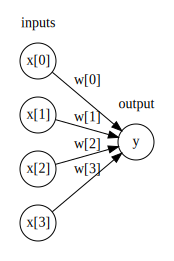

In [50]:
mglearn.plots.plot_logistic_regression_graph()

* Visualization of logistic regression, where input features and predictions are shown as nodes, and the coefficients are connections between the nodes


Here, each node on the left represents an input feature, the connecting lines represent the learned coefficients, and the node on the right represents the output, which is a weighted sum of the inputs. In an MLP this process of computing weighted sums is repeated multiple times, first computing hidden units that represent an intermediate processing step, which are again combined using weighted sums to yield the final result

# Activation Functions

Computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this model truly more powerful than a linear model, we need one extra trick. After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result—usually the rectifying nonlinearity (also known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The result of this function is then used in the weighted sum that computes the output, ŷ. The two functions are visualized below:-

Text(0, 0.5, 'relu(x), tanh(x)')

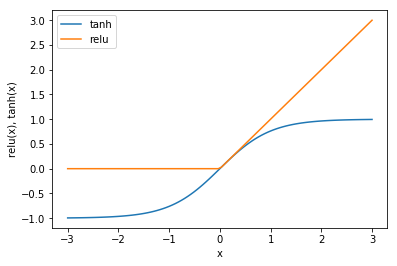

In [54]:
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

# Understanding Multilayer Perceptorn

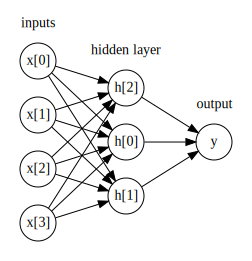

In [52]:
mglearn.plots.plot_single_hidden_layer_graph()

This model has a lot more coefficients (also called weights) to learn: there is one between every input and every hidden unit (which make up the hidden layer), and one between every unit in the hidden layer and the output.

In [40]:
#Required Imports

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import mglearn

* Load Data

In [41]:
X,y=make_moons(n_samples=100,noise=0.25,random_state=0)

In [42]:
#Split into training and testing set 80-20
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

In [43]:
# Build a neural network
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

Text(0, 0.5, 'Feature 1')

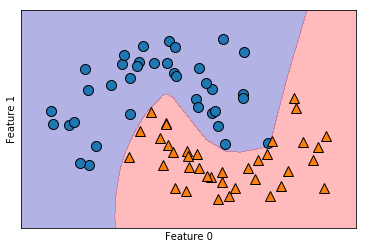

In [44]:
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

As you can see, the neural network learned a very nonlinear but relatively smooth decision boundary. We used algorithm='l-bfgs', which we will discuss later. By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset. We can reduce the number (which reduces the complexity of the model) and still get a good result

In [45]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Text(0, 0.5, 'Feature 1')

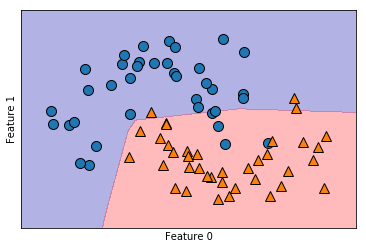

In [46]:
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

With only 10 hidden units, the decision boundary looks somewhat more ragged. The default nonlinearity is relu. With a single hidden layer, this means the decision function will be made up of 10 straight line segments. If we want a smoother decision boundary, we could add more hidden units, add a second hidden layer or use the tanh nonlinearity.

In [47]:
# [10,10] stands for 2 layer with 10 nodes each
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Text(0, 0.5, 'Feature 1')

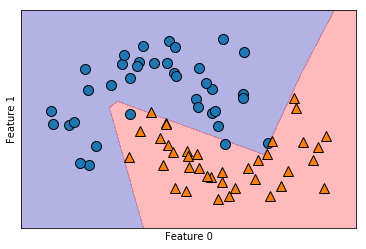

In [48]:
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

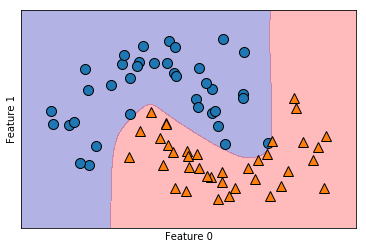

In [55]:
# Using 2 hidden layers with 10 nodes each with tanh activation function
mlp=MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

 Decision boundary learned using 2 hidden layers with 10 hidden units each, with rect activation function


Finally, we can also control the complexity of a neural network by using an l2 penalty to shrink the weights toward zero, as we did in ridge regression and the linear classifiers. The parameter for this in the MLPClassifier is alpha (as in the linear regression models), and it’s set to a very low value (little regularization) by default. Figure 2-52 shows the effect of different values of alpha on the two_moons dataset, using two hidden layers of 10 or 100 units each:


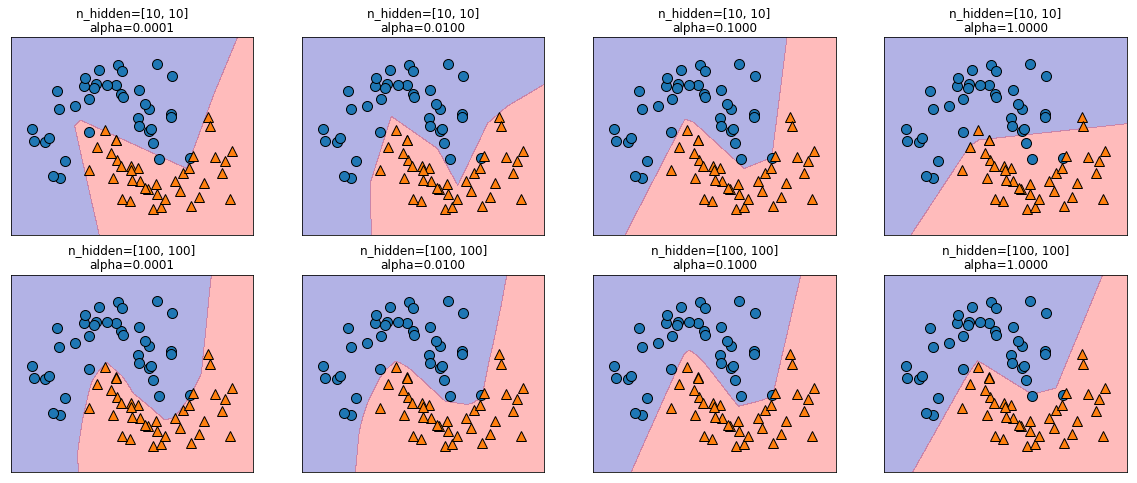

In [60]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train, y_train) 
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)   
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax) 
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

As you probably have realized by now, there are many ways to control the complexity of a neural network: the number of hidden layers, the number of units in each hidden layer, and the regularization (alpha). There are actually even more, which we won’t go into here. An important property of neural networks is that their weights are set randomly before learning is started, and this random initialization affects the model that is learned. That means that even when using exactly the same parameters, we can obtain very different models when using different random seeds. If the networks are large, and their complexity is chosen properly, this should not affect accuracy too much, but it is worth keeping in mind (particularly for smaller networks).

To get a better understanding of neural networks on real-world data, let’s apply the MLPClassifier to the Breast Cancer dataset. We start with the default parameters:


In [155]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [73]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [154]:
X_train, X_test, y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
mlp=MLPClassifier(random_state=0)
mlp.fit(X_train,y_train)
print('Accuracy on training set: {:.2f}'.format(mlp.score(X_train,y_train)))
print('Accuracy on testing set: {:.2f}'.format(mlp.score(X_test,y_test)))

Accuracy on training set: 0.91
Accuracy on testing set: 0.91


The accuracy of the MLP is quite good, but not as good as the other models. As in the earlier SVC example, this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements. Again, we will do this by hand here, but we’ll introduce the StandardScaler to do this automatically later.

* Compute the mean value per feature on training set

In [160]:
mean_on_train=X_train.mean(axis=0)

* Compute the standerd deviation of each feature on the training set

In [161]:
std_on_train=X_train.std(axis=0)

 * subtract the mean, and scale by inverse standard deviation afterward, mean=0 and std=1 

In [164]:
X_train_scaled=(X_train-mean_on_train)/std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled=(X_test - mean_on_train)/std_on_train

In [167]:
mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on testing set: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 0.991
Accuracy on testing set: 0.965


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The results are much better after scaling, and already quite competitive. We got a warning from the model, though, that tells us that the maximum number of iterations has been reached. This is part of the adam algorithm for learning the model, and tells us that we should increase the number of iterations:


In [168]:
mlp=MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled,y_train)

print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on testing set: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 0.993
Accuracy on testing set: 0.972


* This leads to a performance on par with the best models so far.

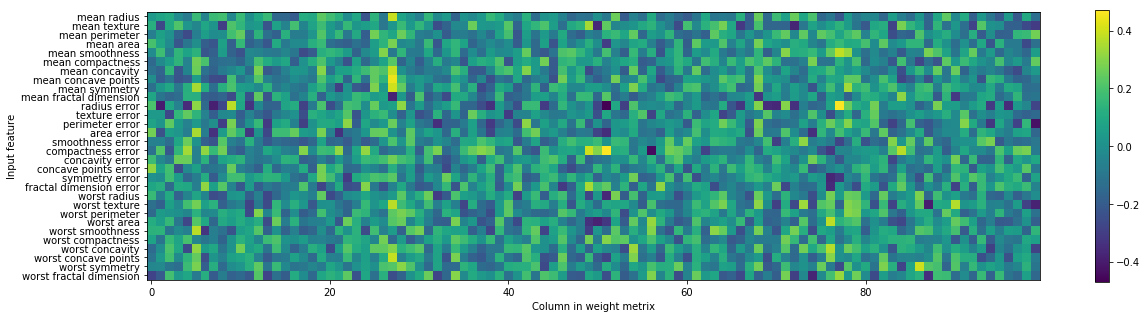

In [181]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Column in weight metrix')
plt.ylabel('Input feature')
plt.colorbar()

One possible inference we can make is that features that have very small weights for all of the hidden units are “less important” to the model. We can see that “mean smoothness” and “mean compactness,” in addition to the features found between “smoothness error” and “fractal dimension error,” have relatively low weights compared to other features. This could mean that these are less important features or possibly that we didn’t represent them in a way that the neural network could use. 

# Strength

Neural networks have reemerged as state-of-the-art models in many applications of machine learning. One of their main advantages is that they are able to capture information contained in large amounts of data and build incredibly complex models. Given enough computation time, data, and careful tuning of the parameters, neural networks often beat other machine learning algorithms (for classification and regression tasks).

# Weaknesses

This brings us to the downsides. Neural networks—particularly the large and powerful ones—often take a long time to train. They also require careful preprocessing of the data, as we saw here. Similarly to SVMs, they work best with “homogeneous” data, where all the features have similar meanings. For data that has very different kinds of features, tree-based models might work better. Tuning neural network parameters is also an art unto itself. In our experiments, we barely scratched the surface of possible ways to adjust neural network models and how to train them. 

# Parameters
The most important parameters are the number of layers and the number of hidden units per layer. You should start with one or two hidden layers, and possibly expand from there. The number of nodes per hidden layer is often similar to the number of input features, but rarely higher than in the low to mid-thousands. A helpful measure when thinking about the model complexity of a neural network is the number of weights or coefficients that are learned. If you have a binary classification dataset with 100 features, and you have 100 hidden units, then there are 100 * 100 = 10,000 weights between the input and the first hidden layer. There are also 100 * 1 = 100 weights between the hidden layer and the output layer, for a total of around 10,100 weights. If you add a second hidden layer with 100 hidden units, there will be another 100 * 100 = 10,000 weights from the first hidden layer to the second hidden layer, resulting in a total of 20,100 weights. If instead you use one layer with 1,000 hidden units, you are learning 100 * 1,000 = 100,000 weights from the input to the hidden layer and 1,000 x 1 weights from the hidden layer to the output layer, for a total of 101,000. If you add a second hidden layer you add 1,000 * 1,000 = 1,000,000 weights, for a whopping total of 1,101,000—50 times larger than the model with two hidden layers of size 100. 

A common way to adjust parameters in a neural network is to first create a network that is large enough to overfit, making sure that the task can actually be learned by the network. Then, once you know the training data can be learned, either shrink the network or increase alpha to add regularization, which will improve generalization performance. 

# Note
An important property of scikit-learn models is that calling fit will always reset everything a model previously learned. So if you build a model on one dataset, and then call fit again on a different dataset, the model will “forget” everything it learned from the first dataset. You can call fit as often as you like on a model, and the outcome will be the same as calling fit on a “new” model. 

# Uncertanity Estimates from Classifiers

Another useful part of the scikit-learn interface that we haven’t talked about yet is the ability of classifiers to provide uncertainty estimates of predictions. Often, you are not only interested in which class a classifier predicts for a certain test point, but also how certain it is that this is the right class. In practice, different kinds of mistakes lead to very different outcomes in real-world applications. Imagine a medical application testing for cancer. Making a false positive prediction might lead to a patient undergoing additional tests, while a false negative prediction might lead to a serious disease not being treated. We will go into this topic in more details later. There are two different functions in scikit-learn that can be used to obtain uncertainty estimates from classifiers: decision_function and predict_proba. Most (but not all) classifiers have at least one of them, and many classifiers have both. Let’s look at what these two functions do on a synthetic two-dimensional dataset, when building a GradientBoostingClassifier classifier, which has both a decision_function and a predict_proba method

In [201]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs,make_circles
X,y=make_circles(noise=0.25,factor=0.5,random_state=1)
y_named=np.array(['blue','red'])[y]
X_train,X_test,y_train_named,y_test_named=train_test_split(X,y_named,random_state=0)

gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

# The Decision Function

In the binary classification case, the return value of decision_function is of shape (n_samples,), and it returns one floating-point number for each sample:

In [203]:
print('X_test.shape: {}'.format(X_test.shape))
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


This value encodes how strongly the model believes a data point to belong to the “positive” class, in this case class 1. Positive values indicate a preference for the positive class, and negative values indicate a preference for the “negative” (other) class:


In [204]:
print('Decision function: \n{}'.format(gbrt.decision_function(X_test)[:6]))

Decision function: 
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


We can recover the prediction by looking only at the sign of the decision function:


In [214]:
print('Thresholded decision function:\n{}'.format(gbrt.decision_function(X_test)>0))
print('Prediction:\n{}'.format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Prediction:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


For binary classification, the “negative” class is always the first entry of the classes_ attribute, and the “positive” class is the second entry of classes_. So if you want to fully recover the output of predict, you need to make use of the classes_ attribute:


In [215]:
# make boolean into 0's and 1's
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)
# use 0 and 1 as indices into classes
pred=gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print('pred is equal to prediction: {}'.format(np.all(pred==gbrt.predict(X_test))))

pred is equal to prediction: True


The range of decision_function can be arbitrary, and depends on the data and the model parameters:

In [216]:
decision_function=gbrt.decision_function(X_test)
print('Decision function minimum: {:.2f} maximum: {:.2f}'.format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


This arbitrary scaling makes the output of decision_function often hard to interpret. 
In the following example we plot the decision_function for all points in the 2D plane using a color coding, next to a visualization of the decision boundary, as we saw earlier. We show training points as circles and test data as triangles

IndexError: boolean index did not match indexed array along dimension 0; dimension is 25 but corresponding boolean dimension is 143

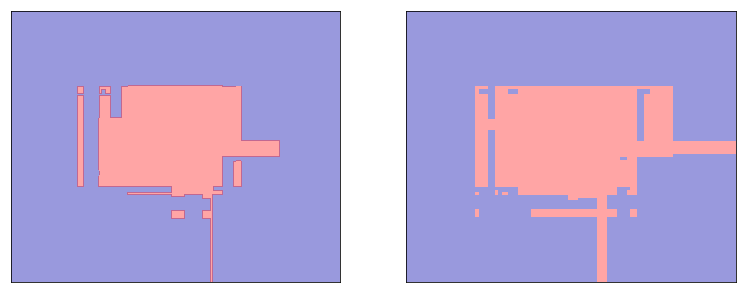

In [221]:
flg,axes=plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
score_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.4,cm=mglearn.cm2)

for ax in axes:    
    # plot training and test points 
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax) 
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1") 
cbar = plt.colorbar(scores_image, ax=axes.tolist()) 
axes[0].legend(["Test class 0", "Test class 1", "Train class 0","Train class 1"], ncol=4, loc=(.1, 1.1))
